### Importamos las librerias

In [2]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import setuptools.dist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

2025-02-10 14:03:26.790677: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-10 14:03:26.836451: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-10 14:03:26.837338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-10 14:03:27.748404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
df = pd.read_csv('../data/car_price_prediction.csv')

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
# Filtrar solo las columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=['number'])

# Obtener los valores únicos de cada columna no numérica
for column in non_numeric_columns:
    print(f"Valores únicos en la columna '{column}':")
    print(non_numeric_columns[column].unique())
    print("\n")  # Salto de línea para mayor claridad

Valores únicos en la columna 'Levy':
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '114

In [8]:
df = df.drop('ID', axis=1)
df['Levy'] = df['Levy'].str.replace("-", "0").astype(float)
df['Mileage'] = df['Mileage'].str.replace(" km", "").astype(float)
df['Doors'] = df['Doors'].replace({
    '04-May': 4,
    '02-Mar': 2,
    '>5': 5
}).astype(int)

df['Leather interior'] = df['Leather interior'].replace({
    'Yes': 1,
    'No': 0
}).astype(int)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  int64  
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  float64
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  int64  
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [9]:
# Filtrar solo las columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=['number'])

# Obtener los valores únicos de cada columna no numérica
for column in non_numeric_columns:
    print(f"Valores únicos en la columna '{column}':")
    print(non_numeric_columns[column].unique())
    print("\n") 

Valores únicos en la columna 'Manufacturer':
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']


Valores únicos en la columna 'Model':
['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']


Valores únicos en la columna 'Category':
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


Valores únicos en la columna 'Fuel type':
['Hybrid' 'Petrol' 'Di

In [10]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del LabelEncoder
le = LabelEncoder()

# Seleccionar las columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Aplicar el LabelEncoder a cada columna no numérica
for column in non_numeric_columns:
    df[column] = le.fit_transform(df[column])

# Verificar los cambios
print(df.head())
print(df.info())

   Price    Levy  Manufacturer  Model  Prod. year  Category  Leather interior  \
0  13328  1399.0            32   1242        2010         4                 1   
1  16621  1018.0             8    658        2011         4                 0   
2   8467     0.0            21    684        2006         3                 0   
3   3607   862.0            16    661        2011         4                 1   
4  11726   446.0            21    684        2014         3                 1   

   Fuel type  Engine volume   Mileage  Cylinders  Gear box type  Drive wheels  \
0          2             63  186005.0        6.0              0             0   
1          5             56  192000.0        6.0              2             0   
2          5             22  200000.0        4.0              3             1   
3          2             46  168966.0        4.0              0             0   
4          5             22   91901.0        4.0              0             1   

   Doors  Wheel  Color  Ai

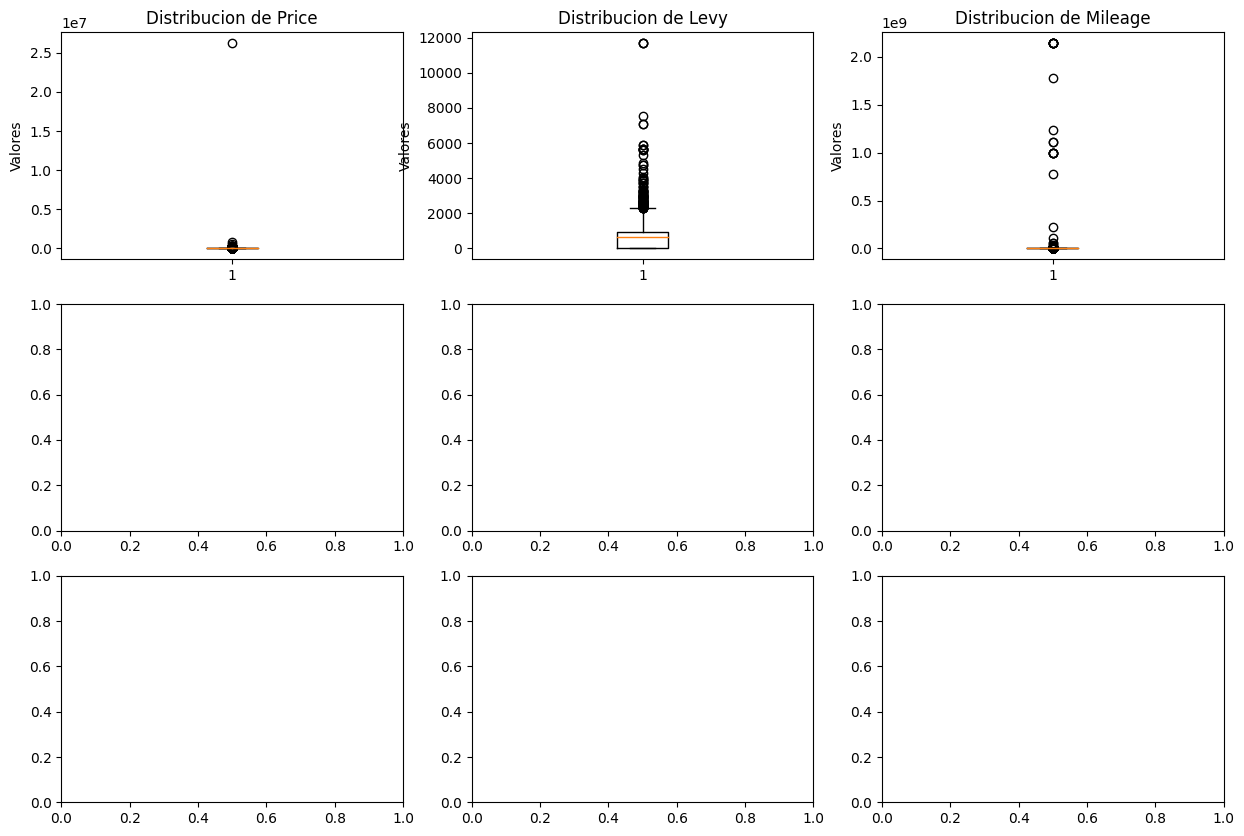

In [11]:
columns_outliers = ['Price', 'Levy', 'Mileage']
data_outliers = df[columns_outliers]
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

#Graficamos la distribucion de las variables numericas
for i, var in enumerate(data_outliers):
    axes[i].boxplot(data_outliers[var])
    axes[i].set_title(f"Distribucion de {var}")
    axes[i].set_ylabel("Valores")

for j in range(len(data_outliers), len(axes)):
    axes[j].axis('off')

plt.show()

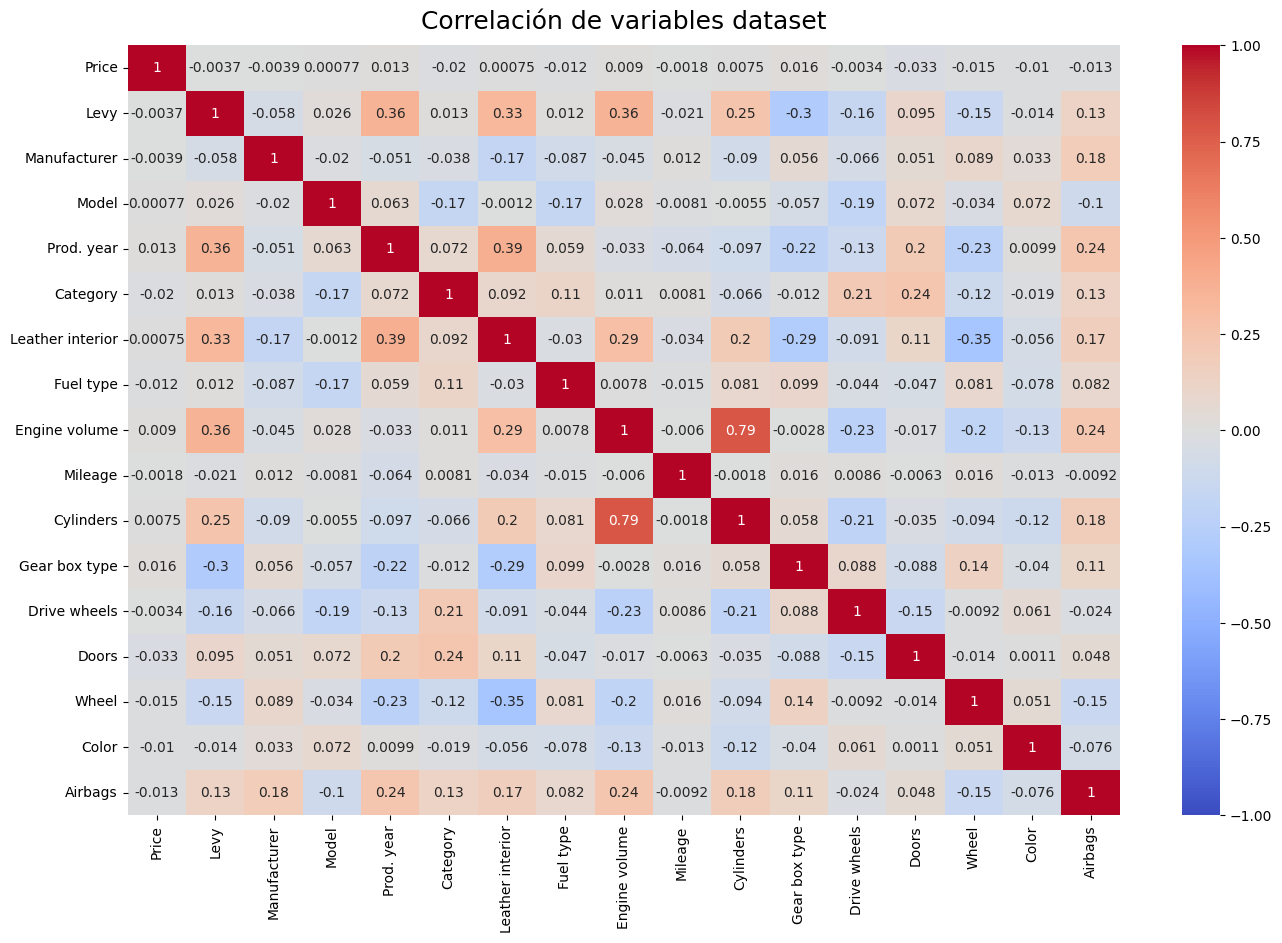

In [12]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlación de variables dataset', fontdict={'fontsize': 18}, pad=12)
plt.show()

In [13]:
X = df.drop('Price', axis=1)
y = df['Price']

In [14]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
numeric_columns = X.select_dtypes(include=['number']).columns

# Crear una instancia del MinMaxScaler
scaler = StandardScaler()

# Escalar las columnas numéricas
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Verificar los cambios
print(X.head())

       Levy  Manufacturer     Model  Prod. year  Category  Leather interior  \
0  1.350118     -0.060828  0.923579   -0.161034 -0.811892          0.615306   
1  0.678997     -1.411723 -0.498032    0.015379 -0.811892         -1.625208   
2 -1.114182     -0.679989 -0.434741   -0.866685 -1.170251         -1.625208   
3  0.404207     -0.961425 -0.490729    0.015379 -0.811892          0.615306   
4 -0.328565     -0.679989 -0.434741    0.544617 -1.170251          0.615306   

   Fuel type  Engine volume   Mileage  Cylinders  Gear box type  Drive wheels  \
0  -0.792543       1.406324 -0.027813   1.180937      -0.598171     -1.600524   
1   0.867354       0.949254 -0.027689   1.180937       1.632519     -1.600524   
2   0.867354      -1.270801 -0.027524  -0.485866       2.747865      0.160474   
3  -0.792543       0.296297 -0.028165  -0.485866      -0.598171     -1.600524   
4   0.867354      -1.270801 -0.029757  -0.485866      -0.598171      0.160474   

      Doors     Wheel     Color   Airb

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (15389, 16)
Tamaño del conjunto de prueba: (3848, 16)


In [16]:
from tensorflow.keras.layers import Dense, Dropout
# Creación del modelo
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Capa de salida para regresión
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Resumen de la arquitectura del modelo
print("\nResumen del modelo:")
model.summary()


Resumen del modelo:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None,

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir el EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',     # Métrica a monitorear (puede ser 'val_accuracy', 'val_loss', etc.)
    patience=5,             # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True # Restaura los pesos del modelo con la mejor métrica de validación
)


In [18]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
481/481 [==============================] - 2s 3ms/step - loss: 45660680192.0000 - mae: 18571.1387 - val_loss: 517861696.0000 - val_mae: 15308.0029
Epoch 2/100
481/481 [==============================] - 1s 3ms/step - loss: 45468930048.0000 - mae: 15173.9395 - val_loss: 287341024.0000 - val_mae: 11150.7227
Epoch 3/100
481/481 [==============================] - 1s 3ms/step - loss: 45350457344.0000 - mae: 13476.1426 - val_loss: 252847632.0000 - val_mae: 10309.7832
Epoch 4/100
481/481 [==============================] - 1s 2ms/step - loss: 45313634304.0000 - mae: 13235.1865 - val_loss: 242896448.0000 - val_mae: 10076.0068
Epoch 5/100
481/481 [==============================] - 1s 2ms/step - loss: 45326200832.0000 - mae: 13225.1533 - val_loss: 237831152.0000 - val_mae: 9969.5283
Epoch 6/100
481/481 [==============================] - 1s 3ms/step - loss: 45317369856.0000 - mae: 13129.1592 - val_loss: 234339776.0000 - val_mae: 9915.5869
Epoch 7/100
481/481 [===========================

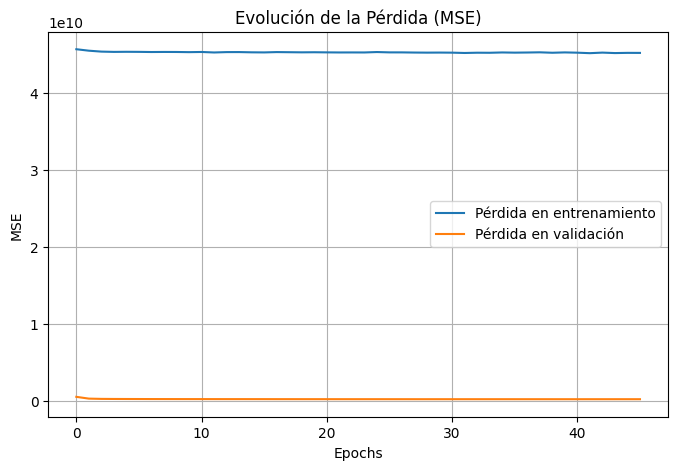

In [19]:
# 6.1 Gráfica de la pérdida (MSE)
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Evolución de la Pérdida (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

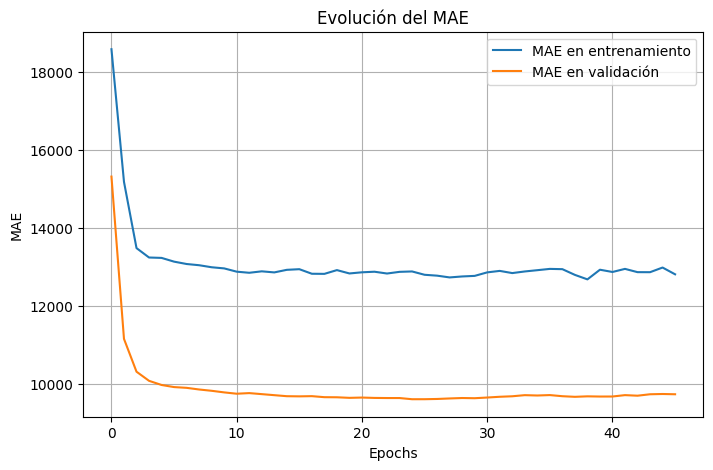

In [20]:
# 6.2 Gráfica del MAE
plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='MAE en entrenamiento')
plt.plot(history.history['val_mae'], label='MAE en validación')
plt.title('Evolución del MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print("\nEvaluación en el conjunto de prueba:")
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)

121/121 [==============================] - 0s 1ms/step - loss: 209434368.0000 - mae: 9674.1592

Evaluación en el conjunto de prueba:
Test Loss (MSE): 209434368.0
Test MAE: 9674.1591796875


121/121 [==============================] - 0s 1ms/step


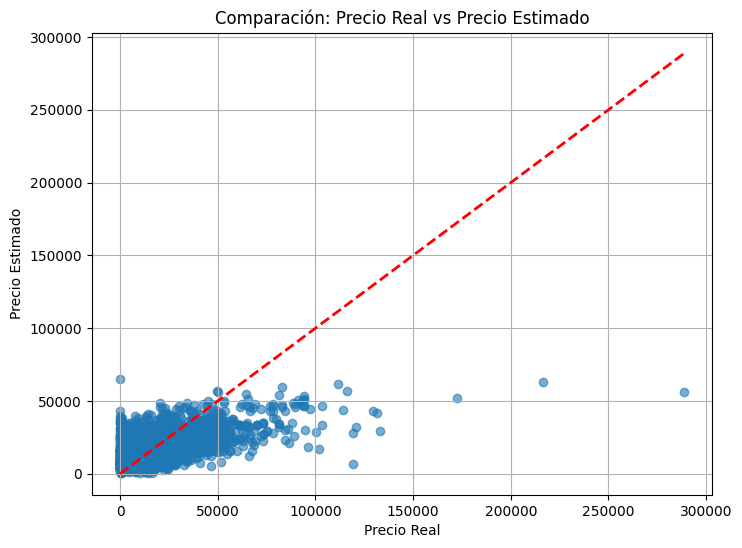

In [22]:
# Predicción de precios para el conjunto de prueba
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Precio Real')
plt.ylabel('Precio Estimado')
plt.title('Comparación: Precio Real vs Precio Estimado')

# Línea de identidad: donde la predicción es igual al valor real
limites = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(limites, limites, 'r--', lw=2)
plt.grid(True)
plt.show()